In [1]:
from fc import *

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from keras import backend as K
from keras.optimizers import Adam

from PIL import Image
import numpy as np

Using TensorFlow backend.


### Read images

In [2]:
import h5py

In [3]:
fn = h5py.File('./saved_models/rock_image_ss2_200x200_onehotlabels.h5', 'r')
train_data = np.array(fn['train'])
train_label = np.array(fn['train_label'])
eval_data = np.array(fn['eval'])
eval_label = np.array(fn['eval_label'])
test_data = np.array(fn['test'])
test_label = np.array(fn['test_label'])
fn.close()

In [4]:
train_data.shape

(3000, 200, 200, 3)

In [5]:
train_label.shape

(3000, 2)

### Plot images

In [6]:
import matplotlib.pyplot as plt

In [7]:
title_dict = {0.0: 'oil wet', 1.0: 'water wet'}

/data/cees/wyun/miniconda3/envs/keras-gpu/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


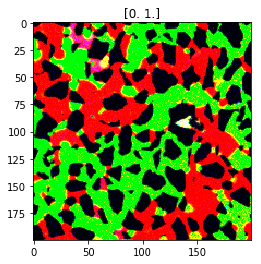

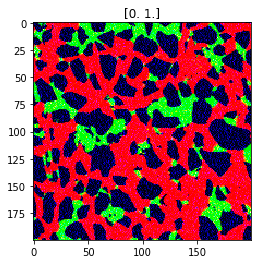

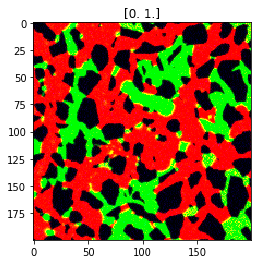

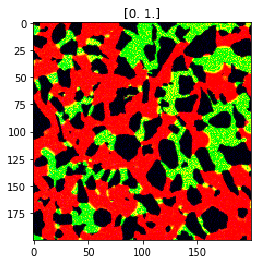

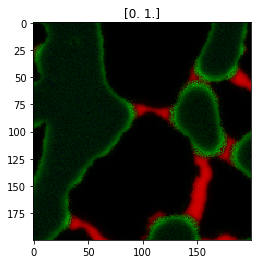

In [8]:
for k in range(5):
    plt.imshow(train_data[k, ...])
    plt.title(train_label[k])
    plt.show()

## Construct FC

In [9]:
dim_x = 200

In [10]:
input_shape =(dim_x, dim_x, 3)
output_dim = 2

In [11]:
fc_model = create_fc(input_shape, output_dim)

In [12]:
fc_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
fc_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           (None, 200, 200, 3)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 120000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               61440512  
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
__________

## Train the model

In [13]:
hist = fc_model.fit(x=train_data, y=train_label, batch_size=50, epochs=20, validation_data=(eval_data, eval_label), verbose=True)

Train on 3000 samples, validate on 100 samples
Epoch 1/20
3000/3000 [==============================] - 60s 20ms/step - loss: 0.4576 - acc: 0.7860 - val_loss: 2.3918 - val_acc: 0.6600
Epoch 2/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.3304 - acc: 0.8553 - val_loss: 3.5319 - val_acc: 0.6300
Epoch 3/20
3000/3000 [==============================] - 3s 1ms/step - loss: 0.2063 - acc: 0.9217 - val_loss: 2.6502 - val_acc: 0.6300
Epoch 4/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1488 - acc: 0.9483 - val_loss: 1.4249 - val_acc: 0.7200
Epoch 5/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1069 - acc: 0.9583 - val_loss: 1.8896 - val_acc: 0.6700
Epoch 6/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0859 - acc: 0.9687 - val_loss: 1.1439 - val_acc: 0.8000
Epoch 7/20
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0714 - acc: 0.9750 - val_loss: 1.1057 - val_acc: 0.7900
Epoch 8/20
30

## Save trained model

In [15]:
#cnn_model.save_weights('./saved_models/cnn_carb_200x200_onehotlabel.h5')
fc_model.save_weights('./saved_models/fc_ss2_200x200_onehotlabel.h5')

## Plot the training process

In [16]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

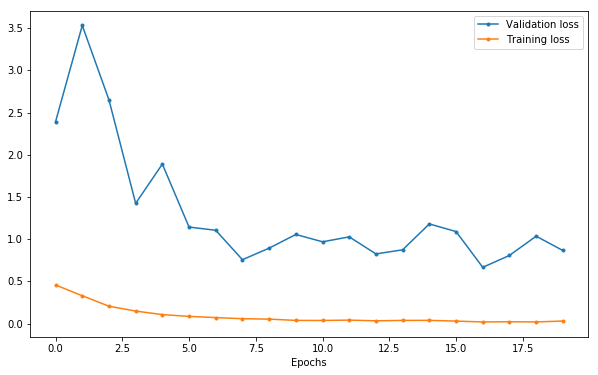

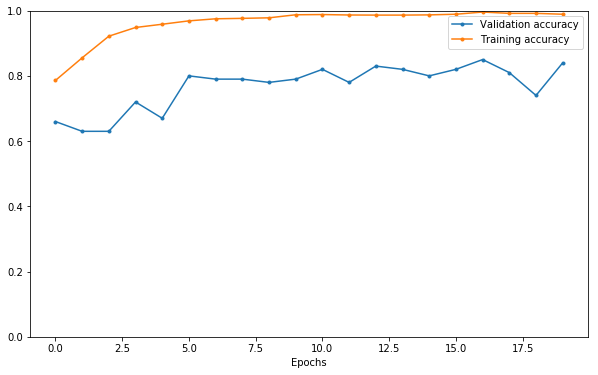

In [20]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['val_loss'], marker='.')
plt.plot(hist.history['loss'], marker='.')
plt.legend(['Validation loss', 'Training loss'])
plt.xlabel('Epochs')
# plt.ylim([0,1])
plt.figure(figsize=(10,6))
plt.plot(hist.history['val_acc'], marker='.')
plt.plot(hist.history['acc'], marker='.')
plt.ylim([0,1])
plt.xlabel('Epochs')
plt.legend(['Validation accuracy', 'Training accuracy'])
plt.show()

In [21]:
import pickle

In [22]:
#pickle.dump( hist.history, open( "saved_models/hist_conv_carb_200x200_onehot_label.pickle", "wb" ) )
pickle.dump( hist.history, open( "saved_models/hist_fc_ss2_200x200_onehot_label", "wb" ) )

#### Analyze Accuracy

In [23]:
test_data.shape

(100, 200, 200, 3)

In [66]:
test_label.shape

(100,)

In [30]:
test_label = np.argmax(test_label, axis=1) # giving indies of max number

In [32]:
test_label.shape

(100,)

In [47]:
print(test_label) # 1 is oil-wet and 0 is water-wet

[1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0
 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1]


In [27]:
test_prob_pred = fc_model.predict(test_data)

In [28]:
test_label_pred = np.argmax(test_prob_pred, axis=1)

In [29]:
test_label_pred.shape

(100,)

In [54]:
print(test_label_pred)

[1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0
 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1]


in test_label, 0 is oil wet and 1 is water wet

##### Calculate False (Incorrect Prediction) + Positive (=waterwet)

In [39]:
test_label_water_wet = test_label[np.where(test_label==0)]
# True labels for all the actually water wet (==0) samples

In [70]:
np.where(test_label==0) #Indies of water-wet image in test_set data

(array([ 1,  2,  3, 10, 11, 14, 15, 16, 17, 18, 22, 24, 28, 29, 31, 33, 35,
        36, 38, 40, 41, 42, 44, 45, 46, 47, 49, 51, 54, 55, 56, 58, 60, 62,
        63, 64, 65, 67, 70, 73, 74, 76, 80, 81, 82, 84, 85, 89, 90, 96, 97]),)

In [58]:
print(test_label_water_wet.shape)

(51,)


In [40]:
test_label_water_wet_pred = test_label_pred[np.where(test_label==0)]
# Predicted labels for all the actually water wet samples in test set

In [73]:
false_postive_water_wet = np.sum(test_label_water_wet_pred != test_label_water_wet) / test_label_water_wet.shape[0]
true_postive_water_wet = np.sum(test_label_water_wet_pred == test_label_water_wet) / test_label_water_wet.shape[0]

In [80]:
print('False-Positive:',false_postive_water_wet,'True-Positive:',true_postive_water_wet)

False-Positive: 0.19607843137254902 True-Positive: 0.803921568627451


#### Calculate False (Incorrect Prediction) + Negative (=Oil-Wet)

In [75]:
test_label_oil_wet = test_label[np.where(test_label==1)]
# True labels for all the actually oil wet samples
test_label_oil_wet_pred = test_label_pred[np.where(test_label==1)]
# Predicted labels for all the actually oil wet samples in test set
print(test_label_oil_wet.shape)

(49,)


In [82]:
false_negative_oil_wet = np.sum(test_label_oil_wet_pred != test_label_oil_wet) / test_label_oil_wet.shape[0]
true_negative_oil_wet = np.sum(test_label_oil_wet_pred == test_label_oil_wet) / test_label_oil_wet.shape[0]
print('False-Positive:',false_negative_oil_wet,'True-Positive:',true_negative_oil_wet)

False-Positive: 0.12244897959183673 True-Positive: 0.8775510204081632


## Plot the saliency map

In [298]:
from keras.losses import binary_crossentropy
import keras.backend as K

def normalize_image(x):
    return (x - x.min()) / (x.max() - x.min())

def plot_saliency_map(saliency_data, ind_correct_score):
    predicted_label = cnn_model.predict(saliency_data)
    saliency = K.gradients(cnn_model.output[:,ind_correct_score], cnn_model.input)[0]
    saliency_evaluator = K.function([cnn_model.input], [saliency], updates=None)
    saliency_map = saliency_evaluator([saliency_data])[0]
    saliency_map = np.max(saliency_map, axis=3)
#     print(saliency_data.shape)
#     print(saliency_map.shape)
#     print(ind_correct_score)
    dict_ = {0: 'water wet', 1: 'oil wet'}
    predicted_label = np.argmax(predicted_label)
    normalized_sal_map = normalize_image(saliency_map)
    normalized_sal_map = np.repeat(normalized_sal_map[:,:,:,None],3,axis=3)**1.5
    # Plot
    plt.figure(figsize=(18,9))
    plt.subplot(1,3,1)
    plt.imshow(saliency_data[0,...])
    plt.title('True label:' + dict_[ind_correct_score])
    #plt.colorbar(fraction=0.046)
    plt.subplot(1,3,2)
    plt.set_cmap('gray')
    plt.imshow(saliency_map[0,...])
    plt.title('Predicted label:' + dict_[predicted_label])
    plt.colorbar(fraction=0.046)
    plt.subplot(1,3,3)
    plt.imshow(normalize_image(normalized_sal_map[0, ...] * saliency_data[0, ...]))
    plt.show()

In [299]:
test_ind_correct_score = np.argmax(test_label, axis=1)

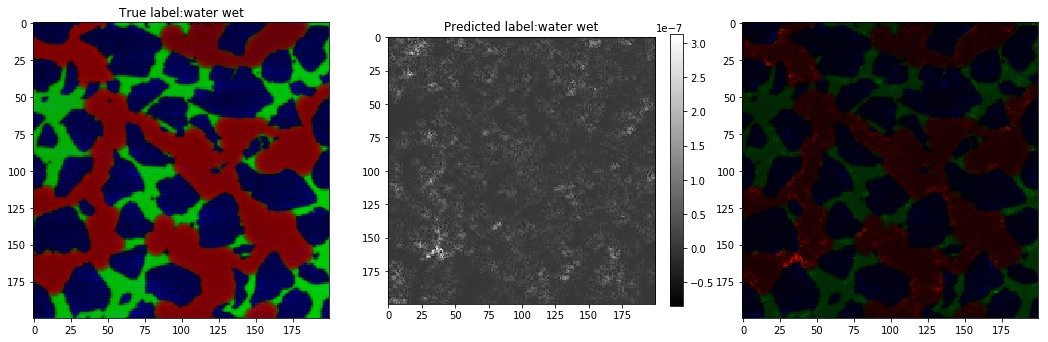

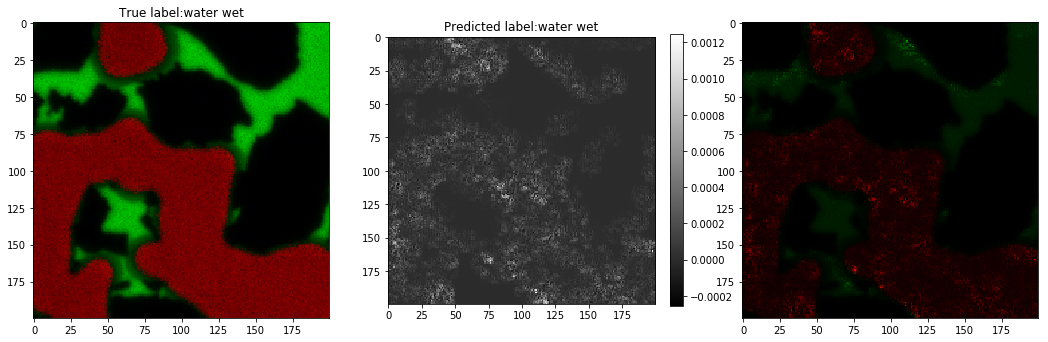

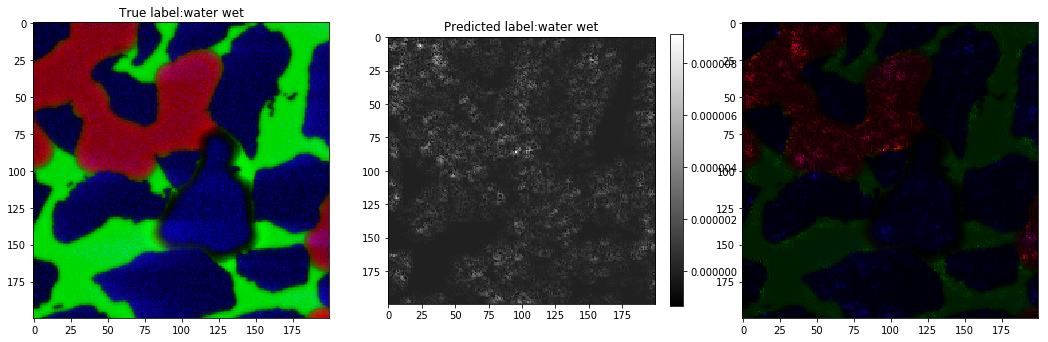

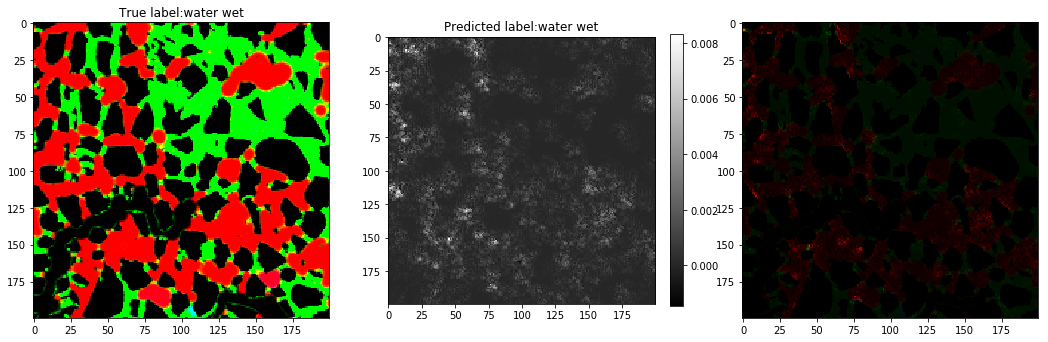

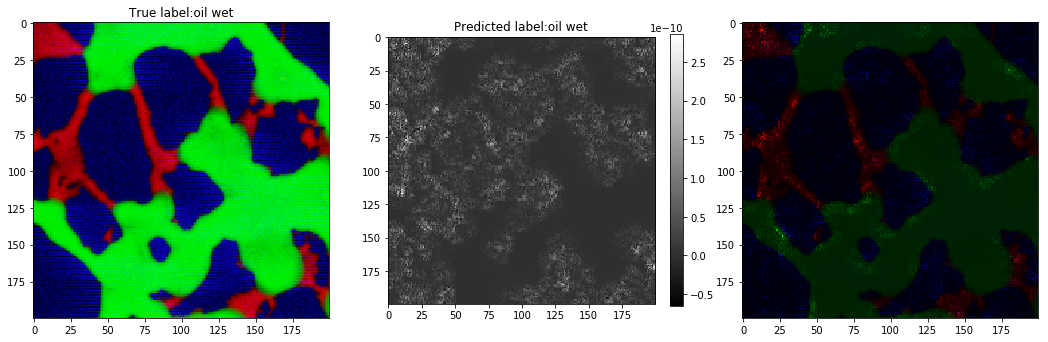

In [300]:
for k in range(5):
    plot_saliency_map(test_data[[k], ...], test_ind_correct_score[k])